# 3.2 Linear Regression Models and Least Squares

We have an input vector $X^T=(X_1,...,X_p)$ and want to predict a real-valued output $Y$.The linear regression model has the form:

$$f(X) = B_0 + \sum_{j=1}^p {X_j\beta_j}$$

 Typically we have a set of training data $(x_1, y_1)...(x_N, y_n)$ from which to estimate the parameters $\beta$. The most popular estimation method is *least squares*, in which we pick $\beta$ to minimize the residual sum of squares, (3.2):
$$ 
\begin{align}
RSS(\beta)&=\sum_{i=1}^N(y_i-f(x_i))\\
&=\sum_{i=1}^N(y_i-\beta_0-\sum_{j=1}^p{x_{ij}\beta_j})^2
\end{align}
$$

How do we minimize (3.2)? We can write the (3.2) using matrix, (3.3):
$$RSS(\beta)=(\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta)$$

Differentiating with respect to $\beta$ we obtain:
$$
\begin{align}
\frac{\partial{RSS}}{\partial\beta} = -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)
\end{align}
$$

Assuming that **X** has full column rank, and hence the second derivative is positive definite:
$$\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)=0$$

and the unique solution is:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

The predicted value at an input vector $x_0$ are given by $\hat{f}(x_0)=(1:x_0)^T\hat{\beta}$:

$$\hat{y}=\mathbf{X}\hat{\beta}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

The matrix $\mathbf{H}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is sometimes called the "hat" matrix.

**Geometrical representation of the least squares:** We denote the column vectors of **X** by $x_0, x_1, ..., x_p$. These vectors span a subspace of $\mathcal{R}^N$, also referred as the column space of **X**. We minimize $RSS(\beta)=||\mathbf{y}-\mathbf{X}\beta||^2$ by choosing $\hat{\beta}$ so that the residual vector $\mathbf{y} - \hat{\mathbf{y}}$ is orthogonal to this subspace and the orthogonality is expressed by $\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)=0$. The hat matrix **H** is the projection matrix.



**Sampling properties of $\hat{\beta}$**: In order to pin down the sampling properties of $\hat{\beta}$, we assume that the observations $y_i$ are uncorrelated and have constant variance $\sigma^2$, and that the $x_i$ are fixed. The variance-covariance matrix is given by (3.8):

$$
\begin{align}
Var(\hat{\beta}) &= E\left[(\hat{\beta}-E(\hat{\beta}))(\hat{\beta}-E(\hat{\beta})^T)\right]\\
&= E\left[(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{\varepsilon}\mathbf{\varepsilon}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\right]\\
&= \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}
\end{align}
$$

One estimates the variance $\sigma^2$ by:
$$
\hat{\sigma}^2 = \frac{1}{N-p-1} \sum_{i=1}^N(y_i-\hat{y_i})^2
$$

The N-p-1 rather than N in the denominator makes $\hat{\sigma}^2$ an unbiased estimate of $\sigma^2$: $E(\hat{\sigma}^2)=\sigma^2$.

*Proof*:
$$
\begin{align}
\hat{\varepsilon} &= \mathbf{y} - \mathbf{\hat{y}}\\
&= \mathbf{X}\beta + \varepsilon - \mathbf{X}\hat{\beta}\\
&= \mathbf{X}\beta + \varepsilon - \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T(\mathbf{X}\beta + \varepsilon)\\
&= \varepsilon - \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon\\
&= (\mathbf{I}_n - \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T)\varepsilon\\
&= (\mathbf{I}_n - \mathbf{H})\varepsilon
\end{align}
$$

and we would like to find $Var(\hat{\varepsilon})=E(\hat{\varepsilon}^T\hat{\varepsilon})$:

$$
\begin{align}
E[\hat{\varepsilon}^T\hat{\varepsilon}] 
&= E\left[\varepsilon^T(\mathbf{I}_n - \mathbf{H})^T(\mathbf{I}_n - \mathbf{H})\varepsilon\right]\\
&= E\left[tr(\varepsilon^T(\mathbf{I}_n - \mathbf{H})^T(\mathbf{I}_n - \mathbf{H})\varepsilon)\right]\\
&= E\left[tr(\varepsilon\varepsilon^T(\mathbf{I}_n - \mathbf{H})^T(\mathbf{I}_n - \mathbf{H}))\right]\\
&= \sigma^2E\left[tr((\mathbf{I}_n - \mathbf{H})^T(\mathbf{I}_n - \mathbf{H}))\right]\\
&= \sigma^2E\left[tr(\mathbf{I}_n - \mathbf{H})\right]\\
&= \sigma^2E\left[tr(\mathbf{I}_n) - tr(\mathbf{I}_p)\right]\\
&= \sigma^2(n-p)
\end{align}
$$

Note that, both $\mathbf{H}$ and $\mathbf{I_n}-\mathbf{H}$ are:

- Symmetry matrix, i.e $\mathbf{H}^T=\mathbf{H}$

- Idempotent matrix, i.e $\mathbf{H}^2=\mathbf{H}$ 


**Inferences about the parameters and the model:** We now assume that deviations of Y around its expectations and Gaussian. Hence (3.9):

$$
\begin{align}
Y &=E(Y|X_1,...,X_p)+\varepsilon\\
&= \beta_0 + \sum_{j=1}^P{X_j\beta_j} + \varepsilon
\end{align}
$$

where $\varepsilon \sim N(0, \sigma^2) $

Under (3.9), it is easy to show that (3.10):
$$
\hat{\beta} \sim N(\beta, (\mathbf{X}^T\mathbf{X})^{-1}\sigma^2)
$$

Also (3.11):
$$(N-p-1)\hat{\sigma}^2 \sim \sigma^2\chi_{N-p-1}^2$$

a chi-squared distribution with N-p-1 degrees of freedom and $\hat{\beta}$ and $\hat{\sigma}$ are statistically independent.


**Hypothesis test:** To test $H_0: \beta_j = 0$ we form the standardized coefficient or *Z-score*:
$$
z_j=\frac{\hat{B}_j}{\hat{\sigma}\sqrt{v_j}}
$$

where $v_j$ is the jth diagonal element of $(\mathbf{X}^T\mathbf{X})^{-1}$. Under the null hypothesis $z_j$ is distributed as $t_{N-p-1}$, and hence a large value of $z_j$ will lead to rejection. If $\hat{\sigma}$ is replaced by $\sigma$ then $z_j$ is a standard normal distribution. The difference between tail quantiles of a t-distribution and a standard normal become negligible as the sample size increases, see the Figure below:

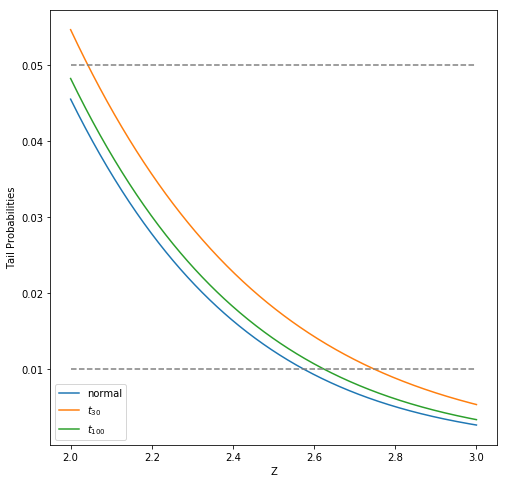

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

def normal_tail_prob(z):
    return 1 - norm.cdf(z) + norm.cdf(-z)

def t_30_tail_prob(z):
    return 1 - t.cdf(z, 30) + t.cdf(-z, 30) 

def t_100_tail_prob(z):
    return 1 - t.cdf(z, 100) + t.cdf(-z, 100) 

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1, 1, 1)

z = np.linspace(2, 3, 500)
axes.plot(z, [*map(normal_tail_prob, z)], label = 'normal')
axes.plot(z, [*map(t_30_tail_prob, z)], label = '$t_{30}$')
axes.plot(z, [*map(t_100_tail_prob, z)], label = '$t_{100}$')

axes.plot([2, 3], [.01, .01], '--', color='gray')
axes.plot([2, 3], [.05, .05], '--', color='gray')
axes.legend()
axes.set_xlabel('Z')
axes.set_ylabel('Tail Probabilities')
plt.show()